# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 3, <font color="blue">легкая часть</font>. Линейная и логистическая регрессии.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Правила оформления теоретических задач:**

* Решения необходимо оформить в виде $\LaTeX$ в markdown-ячейках. Иные способы (в т.ч. фотографии) не принимаются.
* Если вы не знаете $\LaTeX$, используйте ИИ-инструменты для оформления черновика решения. Примеры были показаны на лекции 2 по ИИ-инструментам.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. 
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):

* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 80 баллов
* Задача 3 &mdash; 30 баллов;
* Задача 4 &mdash; 20 баллов;

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):

* Задачи 5-7: скачайте второй ноутбук с условием задания со страницы курса.

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [1]:
# Bot check

# HW_ID: fpmi_ad3_part1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn.axisgrid import PairGrid


sns.set(style="whitegrid", palette="Set2")

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics



random_state = 42


---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 146d04157c07b08ee58d3eafdcf82c32 -->
Рассмотрим модель одномерной линейной регрессии *без свободного параметра* $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы итераций градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).

**3.** Опишите, что произойдет, если для некоторого $i$ ошибка $\varepsilon_i$ будет очень большой.


*Замечания.*
1. Это теоретическая задача, не перепутайте 😄
2. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
3. **Прочитайте требования к формату решения в правилах сдачи задания.**

**Решение:**

1)Пусть есть
$$
X = \begin{pmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{n}
\end{pmatrix}, \quad Y = \begin{pmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{n} \\
\end{pmatrix}
$$
Тогда по формуле $\hat{\theta}$ = $(X^TX)^{-1}X^TY$ посчитаем $\hat{\theta}$:  
$$
(X^TX) = \begin{pmatrix} x_{1} & x_{2} & \cdots & x_{n} \end{pmatrix} \cdot \begin{pmatrix} x_{1} \\ x_{2} \\ \vdots \\ x_{n} \end{pmatrix} =
\sum_{i=1}^{n} x_i^2
$$
$$(X^TX)^{-1} = \frac{1}{\sum_{i=1}^{n} x_i^2} $$
$$
X^T \cdot Y = \sum_{i=1}^{n} x_i \cdot y_i
$$
$$
\hat{\theta} = \frac{\sum_{i=1}^{n} x_i \cdot y_i}{\sum_{i=1}^{n} x_i^2}
$$
2) Шаг градиентного спуска:
$$ \theta_{t+1}  = \theta_{t} - \eta \cdot X^T (X \theta - Y) $$
$$ \theta_{t+1}  = \theta_{t} - \eta \sum_{i=1}^{n} x_i \cdot (x_i \theta_{t} - y_i) $$  
 Стохастический градиентный спуск:
$$ \theta_{t+1} = \theta_{t} - \eta \frac{n}{k}\sum_{j=1}^{k} x_{i_j}(x_{i_j} \theta_{t} - y_{i_j}) $$

3) Если будет какой-то выброс, т.е. ошибка будет очень большой, то на графике линия слишком отклонится и это исказит оценку

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
---
### Задача 2.

*Перед выполнением задачи ознакомтесь с <a href="https://thetahat.ru/courses/ad/main/3/ad_linreg_sklearn">ноутбуком по линейной регрессии</a> с занятия.*

Скоро весна и лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов или самокатов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

<img src="https://thetahat.ru/files/ad/main/3/bike1.jpeg">

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [53]:
bikes = pd.read_csv("day.csv")
columns = ["season", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed", "cnt"]
bikes = bikes[columns]


train, test = train_test_split(bikes, train_size=0.8, random_state=random_state)
train.shape, test.shape

((584, 11), (147, 11))

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 7e2346d718d374e3f957928b573e2a30 -->
#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

Выделим группы признаков

In [83]:
categorial_features = ["season", "mnth", "holiday", "workingday", "weathersit", "weekday"]  # категориальные признаки
real_features = ["temp", "atemp", "hum", "windspeed"]  # вещественные признаки
target_feature = "cnt"  # целевой признак

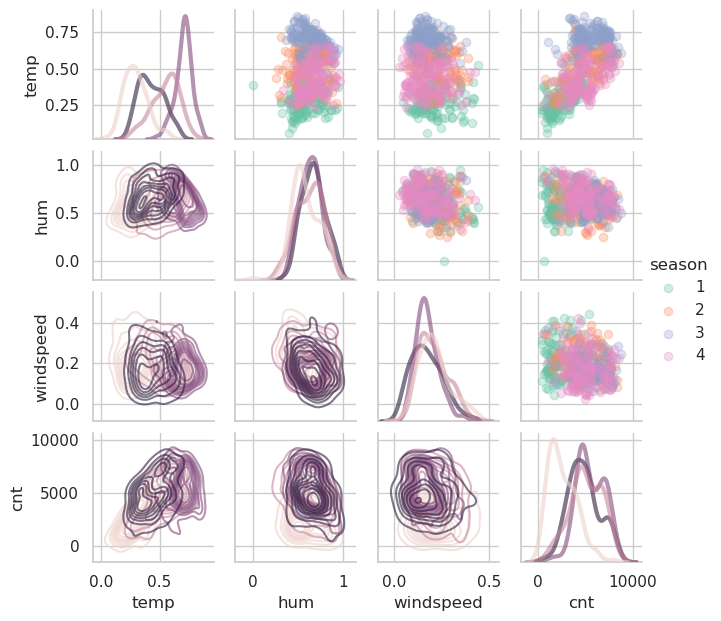

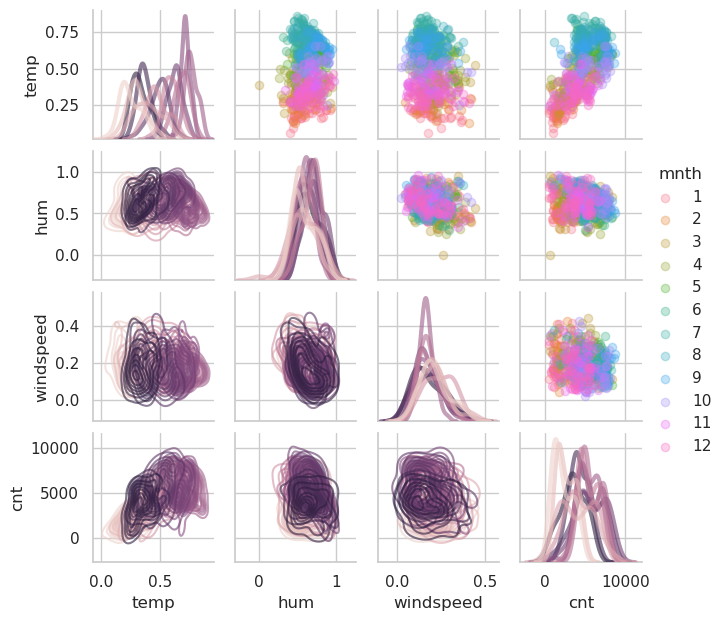

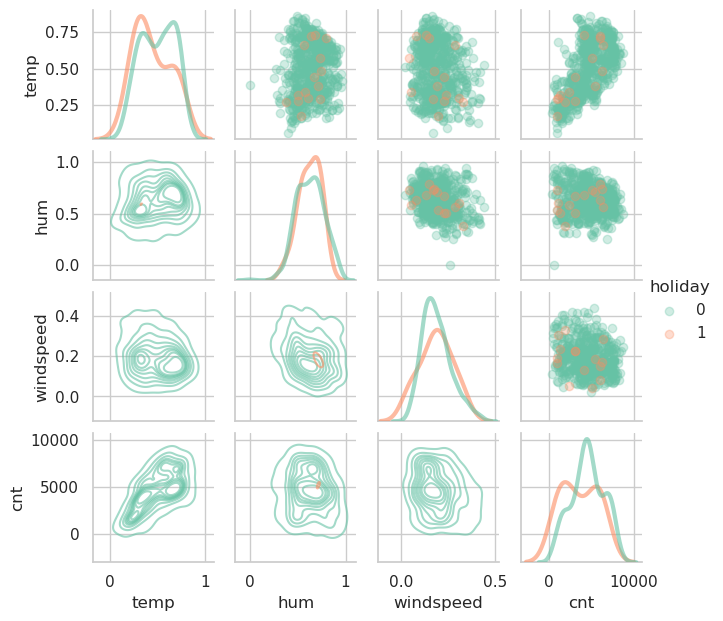

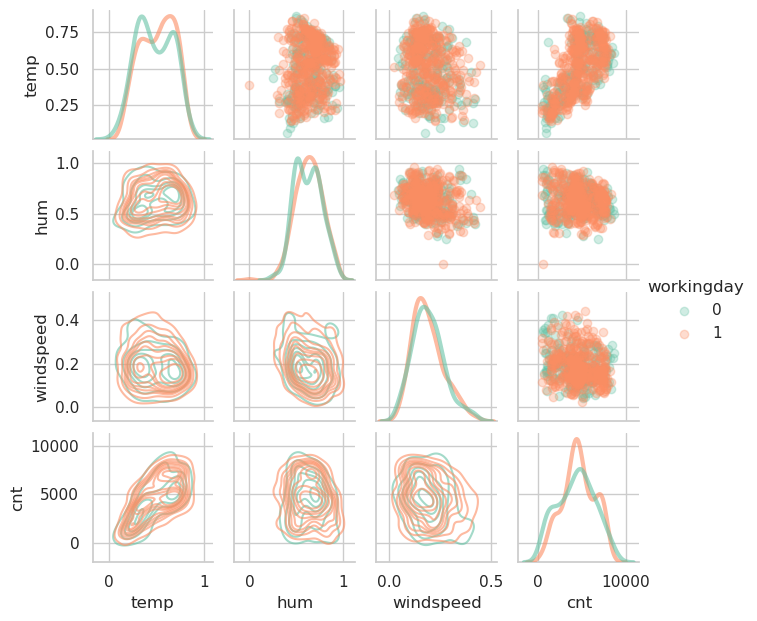

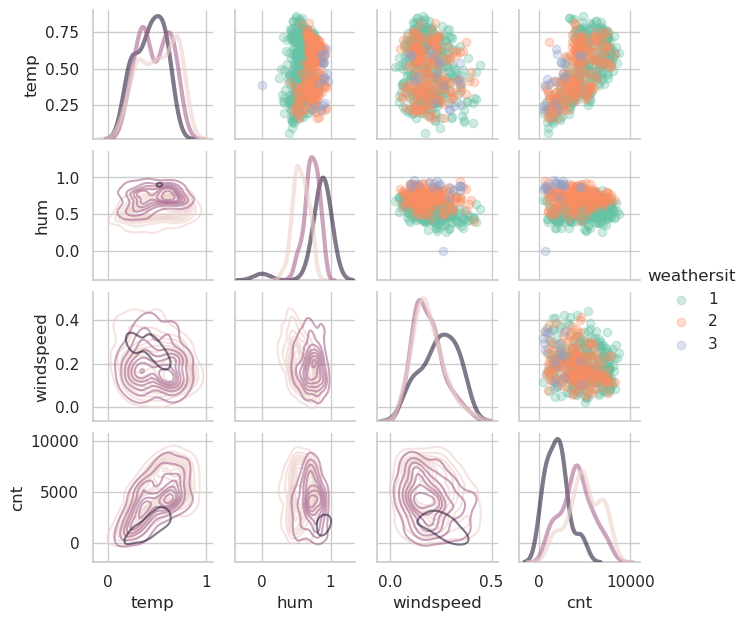

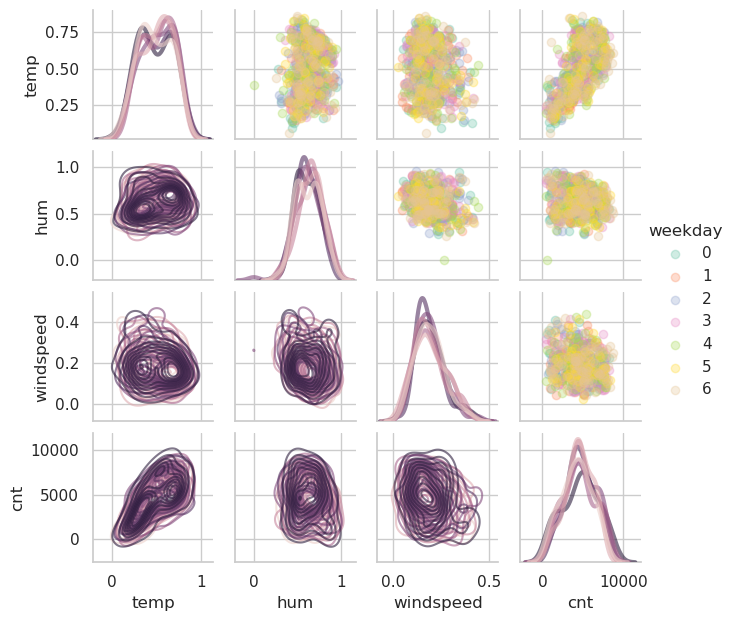

In [96]:
for hue in categorial_features:
    pair_grid = sns.PairGrid(train[["temp", "hum", "windspeed", "cnt", hue]], hue=hue, diag_sharey=False, height=3)

    pair_grid.fig.set_size_inches(6, 6)
    pair_grid.map_lower(sns.kdeplot, alpha=0.6)
    pair_grid.map_upper(plt.scatter, alpha=0.3)
    pair_grid.map_diag(
        sns.kdeplot, lw=3, alpha=0.6, common_norm=False
    )  # каждая плотность по отдельности должна давать 1 при интегрировании

    pair_grid.add_legend()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 4c1edb365b02e434e38deeb52b2096fa -->
Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:**  
1) Есть выбросы на графиках windspeed и hum, temp и hum, cnt и hum, похоже что это одна точка при hum примерно равным нулю. 
2) cnt зависит от температуры линейно, также видно что cnt зависит от времени года

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- e5fcb54a72af33e2c09b66124e63e5fc -->
#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, создание каких-либо новых признаков (посмотрите <a href="https://thetahat.ru/courses/ad/main/3/ad_linreg_sklearn">пример</a> с занятия). То, как именно выполнять подготовку данных, является целым исскуством. Здесь нет "правильного" подхода, здесь есть метрика качества на тестовом множестве, которая в последствии оценит качество вашей модели.

*Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество ваших моделей на следующих шагах.*

**Процедура предобработки данных:**

**a).** Посмотрим какие данные с друг другом коррелируют с помощью корреляционной матрицы, и оставим 1 признак из тех который сильно коррелируют.  
**б).** Уберем выбросы.  
**в).** Преобразуем категориальные признаки.

Реализуйте данную процедуру.

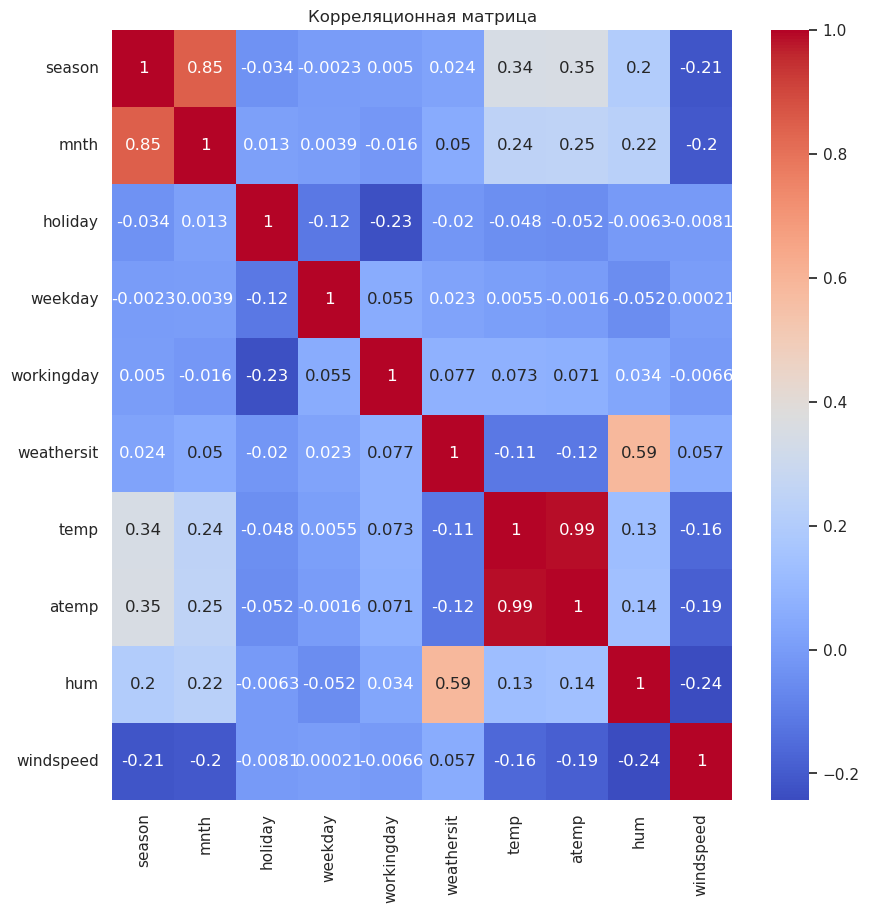

In [ ]:
plt.figure(figsize=(10, 10))
corr = train[["season", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed"]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Исходя из корреляционной матрицы довольно сильно коррелируют season и mnth, temp и atemp. 
Из первой пары оставим mnth, из второй temp.  
Также уберем workingday, так как этот признак связан с weekday

In [ ]:
categorial_features = ["mnth", "holiday", "weathersit", "weekday"]
real_features = ["temp", "hum", "windspeed"]

Построим отдельно график где есть выброс и найдем его

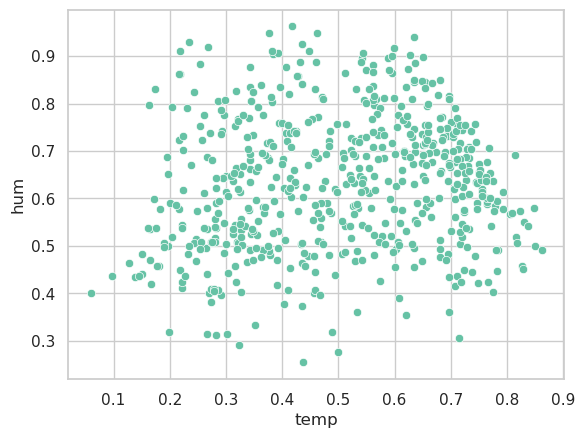

0


In [165]:
sns.scatterplot(data=train, x="temp", y="hum")
plt.show()

print(len(train[train["hum"] == 0].index))
train = train.drop(train[train["hum"] == 0].index)

Преобразуем категориальные признаки

In [166]:
encoder = OneHotEncoder(drop="first", sparse_output=False)  # объявляем модель

# Внимание! Нельзя вызывать fit_transform на тестовых данных!
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем
train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [167]:
encoder.categories_

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([0, 1]),
 array([1, 2, 3]),
 array([0, 1, 2, 3, 4, 5, 6])]

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- c5124704b109dacbd9cf5647f50eb72c -->
#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [168]:
X_train = np.hstack([train[real_features], train_cat])
X_train.shape

(583, 23)

In [169]:
model_full = LinearRegression()
model_full.fit(X_train, train[target_feature])

LinearRegression()

In [170]:
model_full.coef_

array([ 7407.59628725, -3516.0880168 , -3487.6500315 ,    33.86769677,
         805.15778219,   656.54380843,   817.1692934 ,   107.22032951,
        -680.07426033,  -181.85797067,  1165.49556091,  1629.32553577,
        1209.40991473,   896.8185225 ,  -853.43387955,  -160.16327211,
       -1496.26820087,   366.37337788,   249.4318263 ,   237.42170578,
         268.83839868,   428.44690833,   461.6173251 ])

In [171]:
model_full.intercept_

3046.9004959078425

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 0e8e860f57fc7df75f236442f7206c78 -->
Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://thetahat.ru/courses/ad/main/3/ad_linreg_sklearn">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. Особенно стоит обратить на это внимание в случае высоких значений метрик.

Посмотрим есть ли выбросы в тестовой части

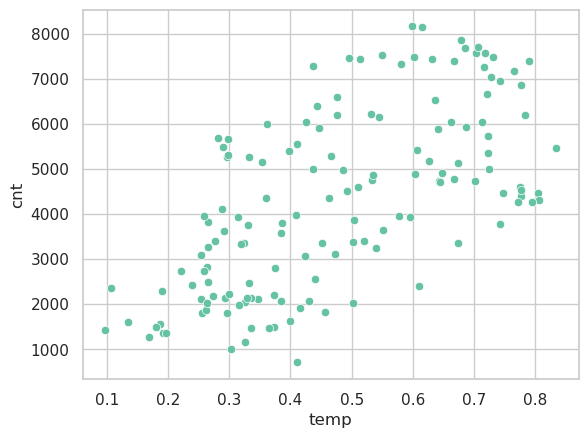

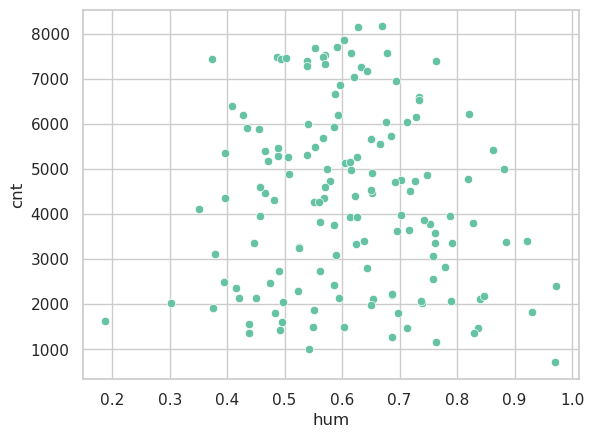

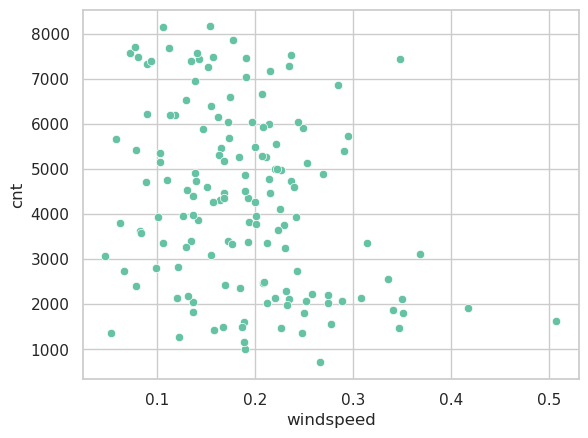

In [172]:
sns.scatterplot(data=test, x="temp", y="cnt")
plt.show()
sns.scatterplot(data=test, x="hum", y="cnt")
plt.show()
sns.scatterplot(data=test, x="windspeed", y="cnt")
plt.show()

Есть точка, где cnt близко к нулю, скорее всего это ошибочные данные

In [173]:
test = test.drop(test[test["cnt"] < 200].index)

Теперь посчитаем ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE.

In [ ]:
# Кодируем категориальные признаки с помощью метода transform обученного ранее кодировщика
test_cat = encoder.transform(test[categorial_features])

# Соединяем данные
X_test = np.hstack([test[real_features], test_cat])

In [175]:
pred = model_full.predict(X_test)

In [176]:
print(f"RMSE - {metrics.mean_squared_error(test[target_feature], pred) ** 0.5}")

print(f"MAE - {metrics.mean_absolute_error(test[target_feature], pred)}")

def mean_absolute_percentage_error(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Вычисляет среднюю абсолютную процентную ошибку (MAPE).

    Параметры:
    y_true (np.ndarray): Истинные значения целевой переменной.
    y_pred (np.ndarray): Прогнозируемые значения.

    Возвращает:
    float: Средняя абсолютная процентная ошибка (MAPE) в процентах.
    """
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()

print(f"MAPE - {mean_absolute_percentage_error(test[target_feature], pred)}")



RMSE - 1401.0831143748235
MAE - 1201.6089362737575
MAPE - 36.54534444225143


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 82920a034ed2865f8a7e2f03eaabceb6 -->
Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками. Причем, возможно, вы уже могли решить эту проблему на предыдущих этапах. В таком случае посмотрите, что будет, если "вернуть" проблему.

Проблема заключается в том, что признаки могут быть линейно зависимыми, вернем обратно признак workingday и посмотрим как это отобразится на коэффициентах.

In [182]:
categorial_features1 = ["mnth", "holiday", "weathersit", "workingday", "weekday"]


encoder1 = OneHotEncoder(drop="first", sparse_output=False)  # объявляем модель

# Внимание! Нельзя вызывать fit_transform на тестовых данных!
train_cat1 = encoder.fit_transform(train[categorial_features1])  # обучаем и кодируем
train_cat1

X_train1 = np.hstack([train[real_features], train_cat1])

model_full1 = LinearRegression()
model_full1.fit(X_train1, train[target_feature])



Y_train = train[target_feature]

Y_train = Y_train.to_numpy()

# Добавляем столбец из единиц
n = X_train1.shape[0]  # Количество строк
ones_column = np.ones((n, 1))  # Столбец из единиц
X_train_with_ones = np.hstack((X_train1, ones_column))  # Добавляем столбец в конец

# Шаг 1: Транспонирование X_train
X_train_T = X_train_with_ones.T

# Шаг 2: Умножение X_train_T на X_train
XT_X = np.dot(X_train_T, X_train_with_ones)

# Шаг 3: Вычисление обратной матрицы
XT_X_inv = np.linalg.inv(XT_X)


# Шаг 4: Умножение X_train_T на Y_train
XT_Y = np.dot(X_train_T, Y_train)

# Шаг 5: Итоговое вычисление
result = np.dot(XT_X_inv, XT_Y)

print(result)
print(model_full1.coef_)

[ 2.17566171e+17  5.47699691e+16  3.18357169e+17  1.46141959e+15
 -8.52881173e+15 -7.17318889e+16 -3.77605059e+16 -6.51624222e+16
 -6.41607332e+16 -5.66316875e+16 -5.56196985e+16 -3.25638283e+16
 -2.16026560e+16 -6.02743140e+15 -2.57619928e+17  1.40577343e+16
 -1.93461275e+16 -2.57619928e+17  1.13504740e+17  4.14471463e+16
  1.85562334e+17  1.13504740e+17  1.13504740e+17  4.33878228e+02
 -7.73198462e+01]
[ 7407.59628725 -3516.0880168  -3487.6500315     33.86769677
   805.15778219   656.54380843   817.1692934    107.22032951
  -680.07426033  -181.85797067  1165.49556091  1629.32553577
  1209.40991473   896.8185225   -510.01300861  -160.16327211
 -1496.26820087   343.42087093    22.95250695   -93.98904463
  -105.99916515   -74.58247225    85.0260374    461.6173251 ]


Получилось, что коэффициенты принимают совсем неправильные значения

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 56aff27d604dbe90dda7b28a8da4e2e9 -->
Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

In [183]:
Y_train = train[target_feature]

Y_train = Y_train.to_numpy()

# Добавляем столбец из единиц
n = X_train.shape[0]  # Количество строк
ones_column = np.ones((n, 1))  # Столбец из единиц
X_train_with_ones = np.hstack((X_train, ones_column))  # Добавляем столбец в конец

# Шаг 1: Транспонирование X_train
X_train_T = X_train_with_ones.T

# Шаг 2: Умножение X_train_T на X_train
XT_X = np.dot(X_train_T, X_train_with_ones)

# Шаг 3: Вычисление обратной матрицы
XT_X_inv = np.linalg.inv(XT_X)


# Шаг 4: Умножение X_train_T на Y_train
XT_Y = np.dot(X_train_T, Y_train)

# Шаг 5: Итоговое вычисление
result = np.dot(XT_X_inv, XT_Y)

print("Результат:")
print(result)
print(model_full.coef_)


Результат:
[ 7407.59628725 -3516.0880168  -3487.6500315     33.86769677
   805.15778219   656.54380843   817.1692934    107.22032951
  -680.07426033  -181.85797067  1165.49556092  1629.32553577
  1209.40991473   896.8185225   -853.43387955  -160.16327211
 -1496.26820087   366.37337788   249.4318263    237.42170578
   268.83839868   428.44690833   461.6173251   3046.90049591]
[ 7407.59628725 -3516.0880168  -3487.6500315     33.86769677
   805.15778219   656.54380843   817.1692934    107.22032951
  -680.07426033  -181.85797067  1165.49556091  1629.32553577
  1209.40991473   896.8185225   -853.43387955  -160.16327211
 -1496.26820087   366.37337788   249.4318263    237.42170578
   268.83839868   428.44690833   461.6173251 ]


In [187]:
Y_pred = np.dot(X_test, result[:-1]) + result[-1]

print(f"RMSE - {metrics.mean_squared_error(test[target_feature], Y_pred) ** 0.5}")

print(f"MAE - {metrics.mean_absolute_error(test[target_feature], Y_pred)}")

def mean_absolute_percentage_error(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Вычисляет среднюю абсолютную процентную ошибку (MAPE).

    Параметры:
    y_true (np.ndarray): Истинные значения целевой переменной.
    y_pred (np.ndarray): Прогнозируемые значения.

    Возвращает:
    float: Средняя абсолютная процентная ошибка (MAPE) в процентах.
    """
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()

print(f"MAPE - {mean_absolute_percentage_error(test[target_feature], Y_pred)}")


RMSE - 1401.083114374815
MAE - 1201.6089362737491
MAPE - 36.54534444225106


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 52266029600cdfda3b1cfce9e68f5c99 -->
Сделайте выводы.

**Выводы:**

В данной работе мы пытались предсказать количество арендованных велосипедов по таким признакам, как температура, погодные условия, время года, день недели и тд, с помощью линейной регрессии. Также мы оценили точность предсказания по различным метрикам: RMSE - 1401.1, MAE - 1201.6, MAPE - 36.5. Также увидели как влияют линейно зависимые параметры на коэффициенты при вычислении их по формуле $(X^T X)^{-1} X^T Y$: линейнозависимые параметры искажают результат, нужно отбирать параметры так, чтобы они не были линейно зависимыми.  


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

<img src="https://thetahat.ru/files/ad/main/3/bike2.png">

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2c0205cf5ab3ec02c6ea667faa01e48b -->
---
### Задача 3.

*Перед выполнением задачи ознакомтесь с <a href="https://thetahat.ru/courses/ad/main/3/ad_logreg_sklearn">ноутбуком по логистической регрессии</a> с занятия.*

> Одно из интересных свойств модели логистической регрессии — *при соблюдении её предположений* она дает возможность получать **несмещенные оценки вероятностей** принадлежности объекта к определенному классу.  
> Для пояснения рассмотрим объект $x$ и соответствующее предсказание вероятности $\widehat{p}(x)$ для класса 1. Если взять небольшую окрестность объекта $x$, то доля объектов класса 1 в этой окрестности будет приблизительно равна $\widehat{p}(x)$.  

Далее проверим это свойство на конкретных примерах.

С помощью кода ниже сгенерируйте данные, состоящие из одного вещественного признака и бинарного таргета.

In [347]:
from sklearn.linear_model import LogisticRegression


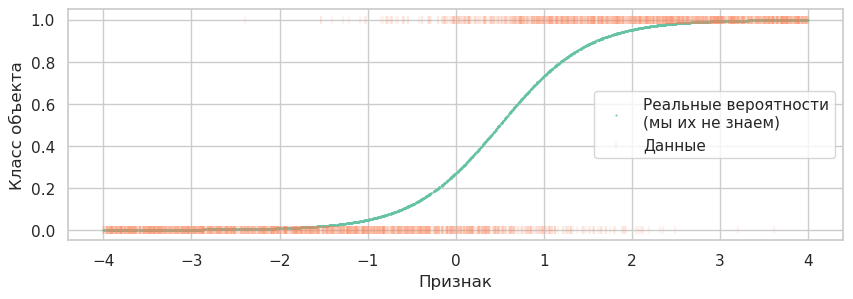

In [348]:
sample_size = 3000  # Размер выборки

np.random.seed(42)

# Признаки
X = np.random.uniform(low=-4, high=4, size=(sample_size, 1))

# Таргет
y_mean_true = 1 / (1 + np.exp(1 - 2 * X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker=".", s=1, label="Реальные вероятности\n(мы их не знаем)")
plt.scatter(X, y, marker="|", alpha=0.1, label="Данные")
plt.xlabel("Признак")
plt.ylabel("Класс объекта")
plt.legend()

Обучите логистическую регрессию, используя реализацию из `sklearn`, при этом свободный коэффициент должен присутствовать в модели. Укажите также `penalty='none'`.

In [349]:
model = LogisticRegression(penalty='none')
model.fit(X, y)

/usr/lib64/python3.12/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

Напечатайте оценку коэффициентов

In [350]:
print(f"Коэффициент - {model.coef_}")
print(f"Свободный коэффициент - {model.intercept_}")

Коэффициент - [[1.97349576]]
Свободный коэффициент - [-1.0090964]


Ниже объявлена сетка значений признака. По этой сетке постройте
* предсказания классов,
* предсказания вероятностей класса 1.

Визуализируйте эти предсказания. На график стоит нанести также обучающую выборку.

In [351]:
X_grid = np.linspace(-4, 4, 10000).reshape((-1, 1))
proba = model.predict_proba(X_grid)[:, 1]
classes = model.predict(X_grid)

print(classes)
print(proba)

[0 0 0 ... 1 1 1]
[1.35951085e-04 1.36165886e-04 1.36381026e-04 ... 9.98974684e-01
 9.98976300e-01 9.98977914e-01]


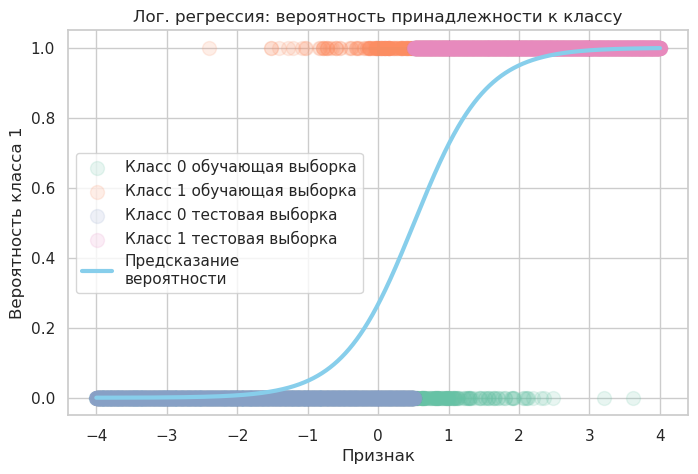

In [352]:
plt.figure(figsize=(8, 5))

plt.scatter(X[y == 0], np.zeros_like(X[y == 0]), s=100, label="Класс 0 обучающая выборка", alpha=0.15)
plt.scatter(X[y == 1], np.ones_like(X[y == 1]), s=100, label="Класс 1 обучающая выборка", alpha=0.15)

plt.scatter(X_grid[classes == 0], np.zeros_like(X_grid[classes == 0]), s=100, label="Класс 0 тестовая выборка", alpha=0.15)
plt.scatter(X_grid[classes == 1], np.ones_like(X_grid[classes == 1]), s=100, label="Класс 1 тестовая выборка", alpha=0.15)

plt.plot(X_grid, proba, label="Предсказание\nвероятности", c="skyblue", linewidth=3)
plt.title("Лог. регрессия: вероятность принадлежности к классу")
plt.xlabel("Признак")
plt.ylabel("Вероятность класса 1")
plt.legend()
plt.show()

Разбейте отрезок $[-4, 4]$ на одинаковые бины длины длины 0.2 и посчитайте в каждом бине долю объектов класса 1. Полученные значения добавьте на график предсказаний вероятностей и сравните эти графики. Проинтерпретируйте полученные результаты.

*Подсказка:* может помочь `np.digitize` и метод `groupby` для таблиц `pandas`. Рекомендуем посмотреть <a href="https://thetahat.ru/courses/python">обучающие ноутбуки</a> по библиотекам.

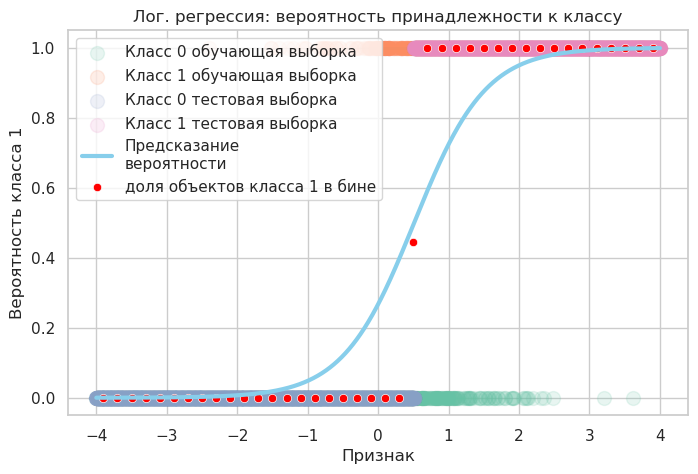

In [353]:
bins = np.arange(-4, 4.2, 0.2)
index = np.digitize(X_grid, bins).ravel()

table = pd.DataFrame({"y":classes, "bin":index})
data_y = table.groupby("bin")["y"].mean()
data_x = bins + 0.1
data_x = data_x[:-1]



plt.figure(figsize=(8, 5))

plt.scatter(X[y == 0], np.zeros_like(X[y == 0]), s=100, label="Класс 0 обучающая выборка", alpha=0.15)
plt.scatter(X[y == 1], np.ones_like(X[y == 1]), s=100, label="Класс 1 обучающая выборка", alpha=0.15)

plt.scatter(X_grid[classes == 0], np.zeros_like(X_grid[classes == 0]), s=100, label="Класс 0 тестовая выборка", alpha=0.15)
plt.scatter(X_grid[classes == 1], np.ones_like(X_grid[classes == 1]), s=100, label="Класс 1 тестовая выборка", alpha=0.15)

plt.plot(X_grid, proba, label="Предсказание\nвероятности", c="skyblue", linewidth=3)
sns.scatterplot(x=data_x, y=data_y, label="доля объектов класса 1 в бине", color="red")
plt.title("Лог. регрессия: вероятность принадлежности к классу")
plt.xlabel("Признак")
plt.ylabel("Вероятность класса 1")
plt.legend()
plt.show()





Повторите проведенное исследование для следующих данных и сравните результаты.

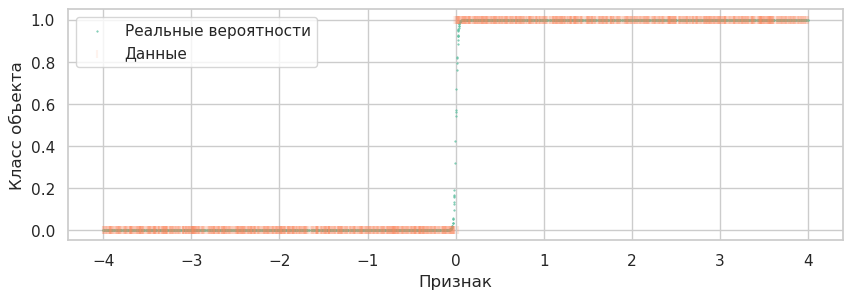

In [354]:
# Признаки
X = np.random.uniform(low=-4, high=4, size=(sample_size, 1))

# Таргет
y_mean_true = 1 / (1 + np.exp(-100 * X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker=".", s=1, label="Реальные вероятности")
plt.scatter(X, y, marker="|", alpha=0.1, label="Данные")
plt.xlabel("Признак")
plt.ylabel("Класс объекта")
plt.legend();

Обучим логистическую регрессию

In [355]:
model = LogisticRegression(penalty="none")
model.fit(X, y)

/usr/lib64/python3.12/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

Напечатаем оценку коэффициентов

In [356]:
print(f"Коэффициент - {model.coef_}")
print(f"Свободный коэффициент - {model.intercept_}")

Коэффициент - [[101.50411758]]
Свободный коэффициент - [0.30815947]


Создадим сетку значений признака, по ней построим предсказания классов и предсказания вероятностей класса 1.  
Построим график для этих значений и еще нанесем на него обучающую выборку.

In [357]:
X_grid = np.linspace(-4, 4, 10000).reshape((-1, 1))
proba = model.predict_proba(X_grid)[:, 1]
classes = model.predict(X_grid)

print(classes)
print(proba)

[0 0 0 ... 1 1 1]
[6.35505527e-177 6.89269405e-177 7.47581716e-177 ... 1.00000000e+000
 1.00000000e+000 1.00000000e+000]


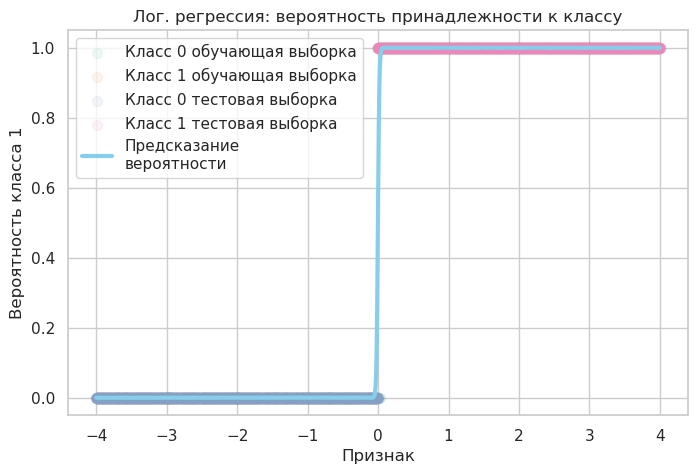

In [358]:
plt.figure(figsize=(8, 5))

plt.scatter(X[y == 0], np.zeros_like(X[y == 0]), s=50, label="Класс 0 обучающая выборка", alpha=0.1)
plt.scatter(X[y == 1], np.ones_like(X[y == 1]), s=50, label="Класс 1 обучающая выборка", alpha=0.1)

plt.scatter(X_grid[classes == 0], np.zeros_like(X_grid[classes == 0]), s=50, label="Класс 0 тестовая выборка", alpha=0.1)
plt.scatter(X_grid[classes == 1], np.ones_like(X_grid[classes == 1]), s=50, label="Класс 1 тестовая выборка", alpha=0.1)

plt.plot(X_grid, proba, label="Предсказание\nвероятности", c="skyblue", linewidth=3)
plt.title("Лог. регрессия: вероятность принадлежности к классу")
plt.xlabel("Признак")
plt.ylabel("Вероятность класса 1")
plt.legend()
plt.show()

Теперь разобьем отрезок $[-4, 4]$ на одинаковые бины длины длины 0.2 и посчитаем в каждом бине долю объектов класса 1. Полученные значения добавим на график предсказаний вероятностей и сравним эти графики.

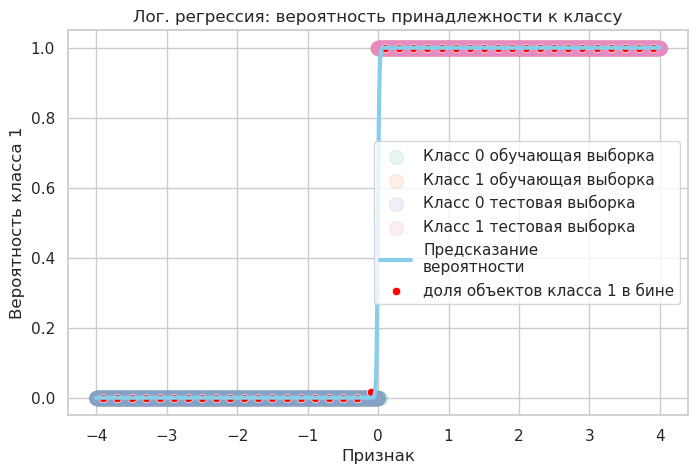

In [359]:
bins = np.arange(-4, 4.2, 0.2)
index = np.digitize(X_grid, bins).ravel()

table = pd.DataFrame({"y":classes, "bin":index})
data_y = table.groupby("bin")["y"].mean()
data_x = bins + 0.1
data_x = data_x[:-1]



plt.figure(figsize=(8, 5))

plt.scatter(X[y == 0], np.zeros_like(X[y == 0]), s=100, label="Класс 0 обучающая выборка", alpha=0.15)
plt.scatter(X[y == 1], np.ones_like(X[y == 1]), s=100, label="Класс 1 обучающая выборка", alpha=0.15)

plt.scatter(X_grid[classes == 0], np.zeros_like(X_grid[classes == 0]), s=100, label="Класс 0 тестовая выборка", alpha=0.15)
plt.scatter(X_grid[classes == 1], np.ones_like(X_grid[classes == 1]), s=100, label="Класс 1 тестовая выборка", alpha=0.15)

plt.plot(X_grid, proba, label="Предсказание\nвероятности", c="skyblue", linewidth=3)
sns.scatterplot(x=data_x, y=data_y, label="доля объектов класса 1 в бине", color="red")
plt.title("Лог. регрессия: вероятность принадлежности к классу")
plt.xlabel("Признак")
plt.ylabel("Вероятность класса 1")
plt.legend()
plt.show()


**Выводы:**

Предсказанная зависимость вероятность действительно идет по сигмоиде, это выполняется и на первом графике и на втором.  
Также график построенный на бинах также соответствует распределению.

---
### Задача 4.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- f92a2876d3f2b0d01fc396776be023a9 -->
Продолжим исследовать модель логистической регрессии. Сгенерируем данные, состоящие из двух бинарных признаков и бинарного таргета

In [360]:
np.random.seed(42)

In [361]:
probs = np.random.uniform(size=8)
probs /= probs.sum()
probs

x = np.random.choice(np.arange(8), p=probs, size=10000)
data = pd.DataFrame(
    np.unpackbits(np.array(x.reshape(-1, 1), dtype=">i8").view(np.uint8), axis=1)[:, -3:],
    columns=["feature_1", "feature_2", "target"],
)
data.head()

,feature_1,feature_2,target
0,0,1,1
1,1,0,0
2,0,0,0
3,1,1,1
4,1,1,1


Особенность таких данных &mdash; конечное число *возможных различных* объектов. В данном случае их всего 4, по количеству всех возможных комбинаций значений признака. Соответственно, любой моделью мы можем сделать только 4 *различных* предсказания. Исследуем, как с этим справляется логистическая регрессия.

Сначала для сравнения посчитайте долю класса 1 для каждой категории объектов.

*Подсказка:* используйте `pd.pivot_table`. Рекомендуем посмотреть <a href="https://thetahat.ru/courses/python">обучающие ноутбуки</a> по библиотекам.

In [385]:
a = data.loc[(data["feature_1"] == 0) & (data["feature_2"] == 0), ["target"]].values.sum() / len(data[(data["feature_1"] == 0) & (data["feature_2"] == 0)])
b = data.loc[(data["feature_1"] == 0) & (data["feature_2"] == 1), ["target"]].values.sum() / len(data[(data["feature_1"] == 0) & (data["feature_2"] == 1)])
c = data.loc[(data["feature_1"] == 1) & (data["feature_2"] == 0), ["target"]].values.sum() / len(data[(data["feature_1"] == 1) & (data["feature_2"] == 0)])
d = data.loc[(data["feature_1"] == 1) & (data["feature_2"] == 1), ["target"]].values.sum() / len(data[(data["feature_1"] == 1) & (data["feature_2"] == 1)])

print(f"Категория 00 - {a}")
print(f"Категория 01- {b}")
print(f"Категория 10 - {c}")
print(f"Категория 11 - {d}")

Категория 00 - 0.7115162037037037
Категория 01- 0.4465209890741806
Категория 10 - 0.4877734877734878
Категория 11 - 0.9414591524683268


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 14e68d57d58f901b3350e63f76b9f8db -->
Обучите логистическую регрессию с `penalty='none'` и получите предсказания вероятностей для этих четырех типов объектов. Представьте результаты в таком виде, чтобы их удобно было сравнивать с частотами, посчитанными ранее.

In [386]:
model = LogisticRegression(penalty="none")
model.fit(data[["feature_1", "feature_2"]], data["target"])

/usr/lib64/python3.12/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

In [387]:
print(f'''Коэффициент при feature_1 - {model.coef_[0][0]}
Коэффициент при feature_2 - {model.coef_[0][1]}
Свободный коэффициент - {model.intercept_[0]}''')

Коэффициент при feature_1 - 1.3466024312997984
Коэффициент при feature_2 - -0.3933613241043459
Свободный коэффициент - 0.5173793905235717


In [388]:
X_data = pd.DataFrame({"feature_1" : [0, 0, 1, 1], "feature_2": [0, 1, 0, 1]})

proba_1 = model.predict_proba(X_data)[:, 1]



# Создаем таблицу для сравнения
comparison_table = pd.DataFrame({
    "Категория": ["00", "01", "10", "11"],
    "Фактическая доля класса 1": [a, b, c, d],
    "Предсказанная вероятность": proba_1
})

# Добавляем разницу между фактической долей и предсказанной вероятностью
comparison_table["Разница"] = comparison_table["Фактическая доля класса 1"] - comparison_table["Предсказанная вероятность"]

print(comparison_table)

  Категория  Фактическая доля класса 1  Предсказанная вероятность   Разница
0        00                   0.711516                   0.626535  0.084981
1        01                   0.446521                   0.530965 -0.084444
2        10                   0.487773                   0.865760 -0.377987
3        11                   0.941459                   0.813152  0.128307


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 1b868a951c9dec0be47540d5316f7e9f -->
Почему результаты не совпадают?

Для ответа на этот вопрос распишите формулу, которая задает модель логистической регрессии, указав все параметры. Какое предположение о данных при этом делает логистическая регрессия?

$$ \hat{p}(x) = \sigma(x^T \hat{\theta}) = \frac{1}{1 + exp(-x^T \hat{\theta})} $$  
Мы предполагали что многочлен $x^T \hat{\theta}$ линеен по изначальным признакам

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 1180c36f8ac39574c944b19ddee07271 -->
Предложите и реализуйте способ построения модели логистической регрессии так, чтобы она точнее предсказывала частоты, посчитанные ранее.

Опишите ваше предложение:

Добавим нелинейный признак равный первый столбец умножить на второй, то есть у нас будут объекты таких категорий:  
000, 010, 100, 111

Реализация:

Теперь у нас есть объекты 4 категорий: 000, 010, 100, 111

In [389]:
data["feature_3"] = data["feature_1"] * data["feature_2"]
print(data)
model = LogisticRegression(penalty="none")
model.fit(data[["feature_1", "feature_2", "feature_3"]], data["target"])

      feature_1  feature_2  target  feature_3
0             0          1       1          0
1             1          0       0          0
2             0          0       0          0
3             1          1       1          1
4             1          1       1          1
...         ...        ...     ...        ...
9995          0          1       1          0
9996          0          1       0          0
9997          1          1       1          1
9998          0          0       0          0
9999          0          1       1          0

[10000 rows x 4 columns]


/usr/lib64/python3.12/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

In [390]:
print(model.coef_)
print(model.intercept_)

[[-0.95166323 -1.11747255  3.94411055]]
[0.90275088]


In [391]:
X_data = pd.DataFrame({"feature_1" : [0, 0, 1, 1], "feature_2": [0, 1, 0, 1], "feature_3": [0, 0, 0, 1]})

proba_1 = model.predict_proba(X_data)
print(proba_1)



# Создаем таблицу для сравнения
comparison_table = pd.DataFrame({
    "Категория": ["00", "01", "10", "11"],
    "Фактическая доля класса 1": [a, b, c, d],
    "Предсказанная вероятность": proba_1[:,1]
})

# Добавляем разницу между фактической долей и предсказанной вероятностью
comparison_table["Разница"] = comparison_table["Фактическая доля класса 1"] - comparison_table["Предсказанная вероятность"]

print(comparison_table)

[[0.28848552 0.71151448]
 [0.55347512 0.44652488]
 [0.51222565 0.48777435]
 [0.05853978 0.94146022]]
  Категория  Фактическая доля класса 1  Предсказанная вероятность  \
0        00                   0.711516                   0.711514   
1        01                   0.446521                   0.446525   
2        10                   0.487773                   0.487774   
3        11                   0.941459                   0.941460   

        Разница  
0  1.723068e-06  
1 -3.892541e-06  
2 -8.609898e-07  
3 -1.071608e-06  


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3f951c224a4ac471c658ed7755ff9521 -->
**Выводы:**

В данной задаче сначала мы предполагали, что $x^T \hat{\theta}$ линеен по первоначальным, но при таком предположении получили очень плохое предсказание. Но когда добавили третий признак равный произведению первого и второго столбца, то предсказанная вероятность совпала до порядка $10^{-6}$. Таким образом иногда стоит рассматривать нелинейные по изначальным признакам признаки.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
---
### <font color="orange"><i>Сложная часть</i></font>

Задачи 5-7: скачайте второй ноутбук с условием задания со страницы курса.